In [1]:
# All imports

from google.colab import files
from IPython.display import Image,display
from PIL import Image
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import timeit
import os
import psutil

Using TensorFlow backend.


In [2]:
# GPU Support
tf.test.gpu_device_name()

'/device:GPU:0'

#Loading the dataset

The handwritten number is  0


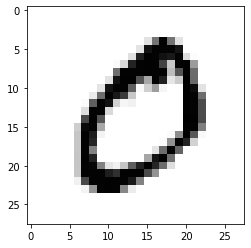

In [3]:
# loading the MNIST dataset, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# To print the image of the written number along with the value in the y column
image_index = 1                 # You may select anything up to y_train.shape[0]

plt.imshow(x_train[image_index], cmap='Greys')
print("The handwritten number is ", y_train[image_index])

#Preprocessing the Dataset

In [0]:
# Creating training set
training_size = 25600

# Creating test set
test_size = 256

# Number of epochs
epoch= 180

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Ensuring the datatype is float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing RGB codes by dividing by the max RGB value.
x_train /= 255
x_test /= 255


y_train.reshape(y_train.shape[0],1)
y_test.reshape(y_test.shape[0],1)

# Converting to categorical values, one hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

 
x_train1 = x_train[0:training_size,:,:,:]
y_train1 = y_train[0:training_size,:]

x_test1 = x_test[0:test_size,:,:,:]
y_test1 = y_test[0:test_size,:]

x_train1 = x_train1.reshape(x_train1.shape[0], 784, )
x_test1 = x_test1.reshape(x_test1.shape[0], 784, )

#Creating the Neural Network Architecture

In [0]:
# CREATING NN ARCHITECTURE 784-2000-2000-10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dropout(0, input_shape=(784,)))         # Input Layer
model.add(tf.keras.layers.Dense(units=2000, activation='relu'))   # ReLU activation on hidden layer 1
model.add(tf.keras.layers.Dropout(0.5))                           # Dropout on hidden layer 1
model.add(tf.keras.layers.Dense(units=2000, activation='relu'))   # Relu activation on hidden layer 2
model.add(tf.keras.layers.Dropout(0.5))                           # Dropout on hidden layer 2
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # Softmax on the output layer


#Creating a Neural Network and training it

In [7]:
start = timeit.default_timer()

y_acc= []
x_plt = []

# Compiling the model with CrossEntropy Loss and using the Adam optimizer for the classification problem
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer =  tf.keras.optimizers.Adam( learning_rate=0.00005,
              beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam') ,metrics=['accuracy'])


# Training the model for epoch number of iterations
for i in range(int(epoch/3)):         
  dropout_history = model.fit(x_train1, y_train1, epochs=3, batch_size= 256,validation_split=0.1,verbose = 1,shuffle=True)
  
  # if(i%3 == 0):               # Evaluating the model every 200-300 weight updates
  y_acc.append(1 - model.evaluate(x_test1, y_test1, batch_size=256)[1])
  x_plt.append(3*i*training_size/256)

finish = timeit.default_timer()

# Evaluating the model on test set after training is complete
y_plt =dropout_history.history['val_loss']
results = model.evaluate(x_test1, y_test1, batch_size= 256)
print('Test accuracy : ', results[0],results[1])


Epoch 1/3
90/90 [==============================] - 1s 14ms/step - loss: 1.2846 - accuracy: 0.6613 - val_loss: 0.5250 - val_accuracy: 0.8613
Epoch 2/3
90/90 [==============================] - 1s 10ms/step - loss: 0.4964 - accuracy: 0.8607 - val_loss: 0.3463 - val_accuracy: 0.9000
Epoch 3/3
1/1 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.9375
Epoch 1/3
90/90 [==============================] - 1s 10ms/step - loss: 0.3230 - accuracy: 0.9071 - val_loss: 0.2615 - val_accuracy: 0.9207
Epoch 2/3
90/90 [==============================] - 1s 10ms/step - loss: 0.2854 - accuracy: 0.9178 - val_loss: 0.2293 - val_accuracy: 0.9305
Epoch 3/3
1/1 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9570
Epoch 1/3
90/90 [==============================] - 1s 10ms/step - loss: 0.2317 - accuracy: 0.9346 - val_loss: 0.1983 - val_accuracy: 0.9402
Epoch 2/3
90/90 [==============================] - 1s 10ms/step - loss: 0.2112 - accuracy: 0.9393 - val_loss: 

In [8]:
print("The time taken is " + str(finish - start))

The time taken is 175.76650263500005


Plotting the test error graph

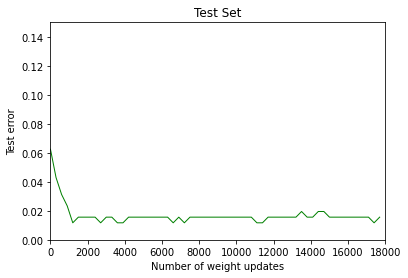

The time taken is 175.76650263500005


In [10]:
# Plotting the graph of varying test error against weight updates
plt.plot(x_plt, y_acc, color='green', linewidth = 1)
plt.ylim(0,0.15) 
plt.xlim(0,18000) 
  
# Naming the axes 
plt.xlabel('Number of weight updates')  
plt.ylabel('Test error') 
  
# Giving a title to the graph 
plt.title('Test Set') 
  
# Displaying the plot 
plt.show()

print("The time taken is " + str(finish - start)) 